In [ ]:
# Unzip file
!unzip /content/dataset.zip -d /content/

Archive:  /content/dataset.zip
  inflating: /content/dataset/test-30/000000001650.jpg  
  inflating: /content/dataset/test-30/000000001773.jpg  
  inflating: /content/dataset/test-30/000000001685.jpg  
  inflating: /content/dataset/test-30/000000001671.jpg  
  inflating: /content/dataset/test-30/000000001410.jpg  
  inflating: /content/dataset/test-30/000000001750.jpg  
  inflating: /content/dataset/test-30/000000001643.jpg  
  inflating: /content/dataset/test-30/000000001371.jpg  
  inflating: /content/dataset/test-30/000000001717.jpg  
  inflating: /content/dataset/test-30/000000001444.jpg  
  inflating: /content/dataset/test-30/000000001494.jpg  
  inflating: /content/dataset/test-30/000000001730.jpg  
  inflating: /content/dataset/test-30/000000001653.jpg  
  inflating: /content/dataset/test-30/000000001583.jpg  
  inflating: /content/dataset/test-30/000000001702.jpg  
  inflating: /content/dataset/test-30/000000001600.jpg  
  inflating: /content/dataset/test-30/000000001657.jpg  


## **Data Loading**

In [ ]:
# Import libaries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import json
from tqdm import tqdm
from PIL import Image, ImageStat, ImageEnhance
import shutil
import random

import warnings

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator, image

import tensorflow.keras.backend as K

warnings.filterwarnings('ignore')

In [ ]:
# Load Image Data Directories

train_dir = "/content/dataset/train-300/data"
test_dir = "/content/dataset/test-30"
val_dir = "/content/dataset/validation-300/data"


# Load Lables
train_label = "/content/dataset/train-300/labels.json"
val_label = "/content/dataset/validation-300/labels.json"

## **Data and Exploratory Data Analysis**

In [ ]:
# Get Value Count
def get_count(dir):
  return sum([len(files) for r, d, files in os.walk(dir)])

In [ ]:
# Count images in each dir
train_count = get_count(train_dir)
test_count = get_count(test_dir)
val_count = get_count(val_dir)

In [ ]:
# Print the count
print("Train Count: ", train_count)
print("Test Count: ", test_count)
print("Val Count: ", val_count)

Train Count:  300
Test Count:  30
Val Count:  300


Both Train and Validation have 300 images in it, while in test data there are 30 images.

In [ ]:
# Function to load JSON data
def load_json(file_path):
  with open(file_path, 'r') as file:
    data = json.load(file)
  return data

# Load the JSON data
train_labels = load_json(train_label)
validation_labels = load_json(val_label)

# Display loaded data
print("Train Labels Data:")
print(train_labels)
print("\nValidation Labels Data:")
print(validation_labels)

Train Labels Data:
{'info': {'year': 2017, 'version': '1.0', 'contributor': 'COCO Consortium', 'url': 'http://cocodataset.org', 'date_created': '2017/09/01'}, 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 

### **Display 5 Images**

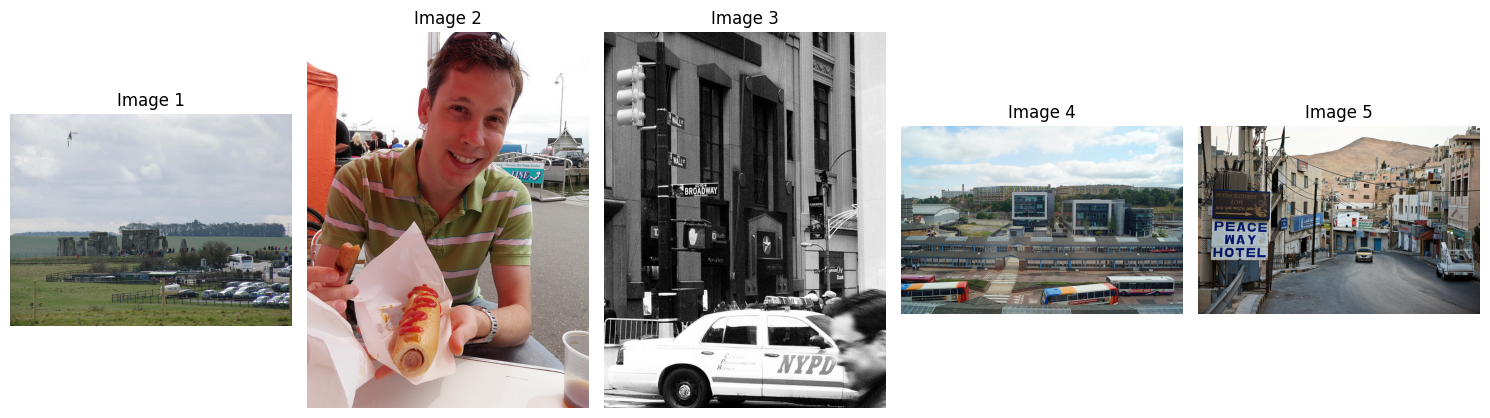

In [ ]:
# Get image file name
image_files = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]

# Define 5 subplot
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(min(5, len(image_files))):
  image_path = os.path.join(train_dir, image_files[i])
  image = Image.open(image_path)

  # Show images in corresponding subplot
  axes[i].imshow(image)
  axes[i].axis('off')
  axes[i].set_title(f"Image {i+1}")

# Show images
plt.tight_layout()
plt.show()

 ### **Mean and Standard Deviation for Heights and Widths**

In [ ]:
# Get the list of image file names in the folder
image_files = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]

In [ ]:
# Initialise lists to store image heights and widths
heights = []
widths = []

In [ ]:
# Iterate over the images and store their dimensions
for image_file in image_files:
    image_path = os.path.join(train_dir, image_file)
    image = Image.open(image_path)
    # Get height and weight
    width, height = image.size
    # Append in list
    heights.append(height)
    widths.append(width)


In [ ]:
# Calculate mean and std for heights and widths
mean_height = np.mean(heights)
mean_width = np.mean(widths)
std_height = np.std(heights)
std_width = np.std(widths)

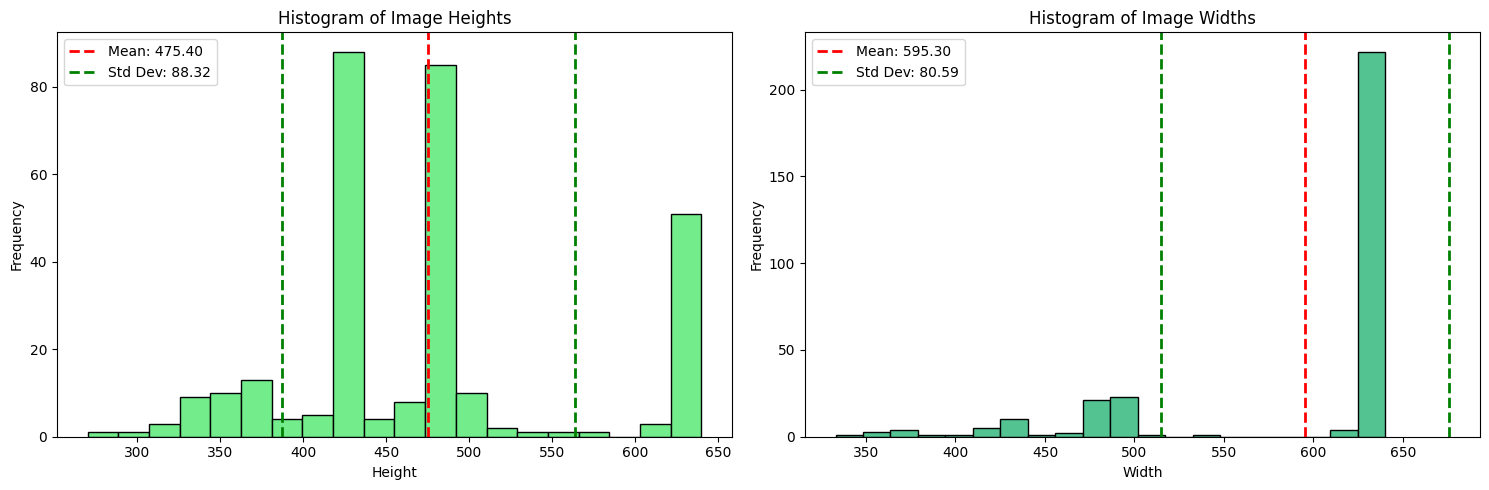

In [ ]:
# Create the histogram plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for heights
ax[0].hist(heights, bins=20, color='#73EC8B', edgecolor='black')
# Add mean and std lines
ax[0].axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_height:.2f}')
ax[0].axvline(mean_height + std_height, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_height:.2f}')
ax[0].axvline(mean_height - std_height, color='green', linestyle='dashed', linewidth=2)
# Add title and labels
ax[0].set_title("Histogram of Image Heights")
ax[0].set_xlabel("Height")
ax[0].set_ylabel("Frequency")
# Add legend
ax[0].legend()

# Plot histogram for widths
ax[1].hist(widths, bins=20, color='#54C392', edgecolor='black')
# Add mean and std lines
ax[1].axvline(mean_width, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_width:.2f}')
ax[1].axvline(mean_width + std_width, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_width:.2f}')
ax[1].axvline(mean_width - std_width, color='green', linestyle='dashed', linewidth=2)
# Add title and labels
ax[1].set_title("Histogram of Image Widths")
ax[1].set_xlabel("Width")
ax[1].set_ylabel("Frequency")
# Add legend
ax[1].legend()

# Show plot
plt.tight_layout()
plt.show()

The plot show that the image heights are clustered around 475 pixels with a standard deviation of 88, while the image widths are centered around 595 pixels with a standard deviation of 80. This suggests that the images are generally taller than they are wide.

### **Values Distribution**

In [ ]:
def pxl_value(directory, target_size=(224, 224)):
    """Extracts pixel values from images in a directory.

    Args:
        directory: Path to the directory containing images.
        target_size: Desired size of the images.

    Returns:
        A NumPy array containing pixel values for each image.
    """

    pixel_values = []
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)

        if image is not None:
            # Resize the image to a consistent size
            image_resized = cv2.resize(image, target_size)
            # Flatten the image and append to the list
            pixel_values.append(image_resized.flatten())

    return np.array(pixel_values)

In [ ]:
# Get pixel values
train_pixel_values = pxl_value(train_dir)

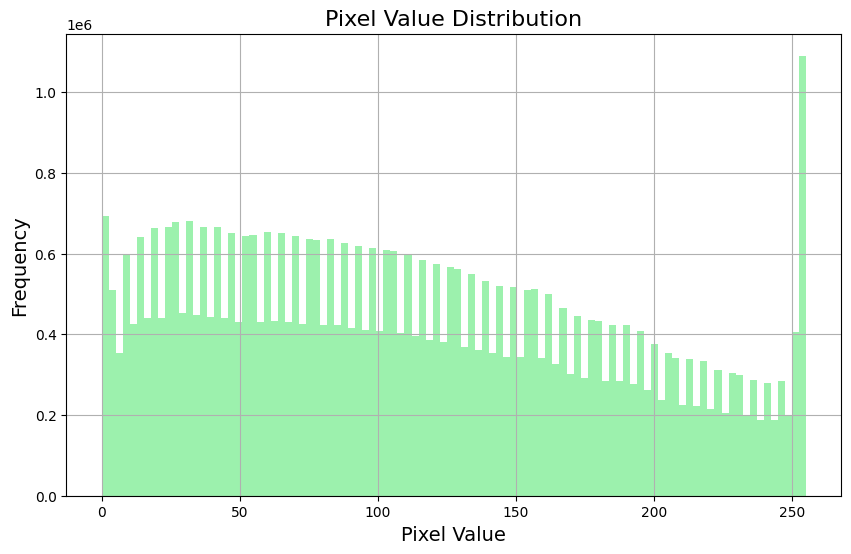

In [ ]:
# Plot pixel values distribution
plt.figure(figsize=(10, 6))
# Make the hist plot
plt.hist(train_pixel_values.flatten(), bins=100, color='#73EC8B', alpha=0.7)
#  Add title and label
plt.title('Pixel Value Distribution', fontsize=16)
plt.xlabel('Pixel Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Add grid
plt.grid(True)
# Show plot
plt.show()

The plot displays the distribution of pixel values within an image. Most pixels have values below 100, suggesting the image is predominantly dark or has a low contrast.


### **Image Properties**

In [ ]:
# List to store image properties
image_properties = []

In [ ]:
# Loop through each image in the directory
for filename in os.listdir(train_dir):
    # Construct file path
    file_path = os.path.join(train_dir, filename)

    # Only process files with image extensions
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Open image
        with Image.open(file_path) as img:
            # Get image dimensions
            width, height = img.size
            # Get colour mode (RGB, L, etc.)
            colour_mode = img.mode

            # Convert image to grayscale for brightness and contrast calculations
            grayscale_img = img.convert("L")

            # Calculate brightness as the mean of pixel values in grayscale
            stat = ImageStat.Stat(grayscale_img)
            brightness = stat.mean[0]

            # Calculate contrast as the standard deviation of pixel values in grayscale
            contrast = stat.stddev[0]

            # Store the properties in the list
            image_properties.append({
                'filename': filename,
                'width': width,
                'height': height,
                'colour_mode': colour_mode,
                'brightness': brightness,
                'contrast': contrast
            })

In [ ]:
# Convert the list to a DataFrame for better visualisation
image_properties_df = pd.DataFrame(image_properties)

In [ ]:
# Check data
image_properties_df.head()

filename  width  height colour_mode  brightness   contrast
0  000000007685.jpg    640     480         RGB  153.057311  62.245801
1  000000016403.jpg    480     640         RGB  151.989945  70.221216
2  000000010920.jpg    480     640         RGB  109.658499  82.383613
3  000000006414.jpg    640     425         RGB  139.142217  73.652053
4  000000000094.jpg    640     427         RGB  121.849671  65.307176

In [ ]:
# Data statistic information
image_properties_df.describe()

width      height  brightness    contrast
count  300.000000  300.000000  300.000000  300.000000
mean   595.296667  475.396667  113.838770   64.043817
std     80.725154   88.464149   25.849171   12.858875
min    333.000000  270.000000   40.084979   21.065828
25%    612.000000  426.000000   96.526999   55.493607
50%    640.000000  480.000000  113.660736   63.758122
75%    640.000000  482.500000  131.511263   71.509309
max    640.000000  640.000000  183.869398  102.864254

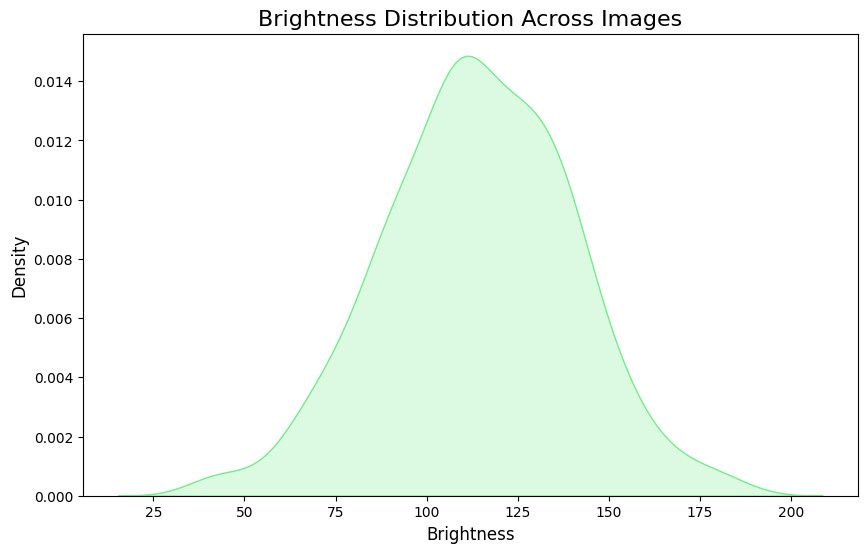

In [ ]:
# Create a KDE plot for brightness
plt.figure(figsize=(10, 6))
sns.kdeplot(image_properties_df['brightness'], color='#73EC8B', shade=True)

# Add labels and title
plt.title('Brightness Distribution Across Images', fontsize=16)
plt.xlabel('Brightness', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

The plot shows the distribution of brightness values across images. The majority of images have brightness values concentrated around 100, with a bell-shaped distribution indicating a consistent level of brightness across the dataset.


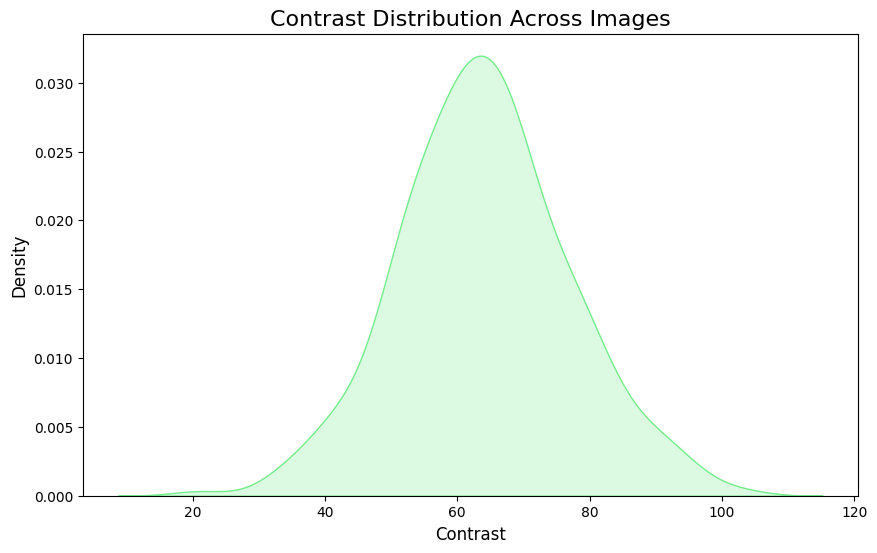

In [ ]:
# Create a KDE plot for contrast
plt.figure(figsize=(10, 6))
sns.kdeplot(image_properties_df['contrast'], color='#73EC8B', shade=True)

# Add labels and title
plt.title('Contrast Distribution Across Images', fontsize=16)
plt.xlabel('Contrast', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

The plot show the distribution of contrast values across the images. The majority of images exhibit contrast values clustered around 70, with a bell-shaped distribution indicating a consistent level of contrast across the dataset.


## **Image Masking**

The cells help in creating the mask of the images based on the given label file.

In [ ]:
# Load Labels
with open('/content/dataset/train-300/labels.json', 'r') as f:
    coco_data = json.load(f)

In [ ]:
# Function to create mask from segmentation
def create_mask(image_shape, segmentation):
  """
  Mask the image
  """
  mask = np.zeros(image_shape[:2], dtype=np.uint8)
  for segment in segmentation:
    points = np.array(segment, dtype=np.int32).reshape(-1, 2)
    cv2.fillPoly(mask, [points], 255)
  return mask

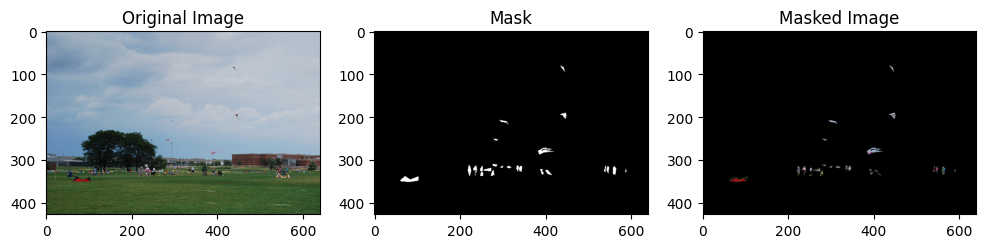

In [ ]:
# Load an example image
image_path = "/content/dataset/train-300/data/000000000149.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Find the corresponding annotations for the image
image_id = 1
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

# Generate mask
mask = np.zeros(image.shape[:2], dtype=np.uint8)
for ann in annotations:
    if 'segmentation' in ann and isinstance(ann['segmentation'], list):
        mask = cv2.bitwise_or(mask, create_mask(image.shape, ann['segmentation']))

# Apply mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
# Orginal
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 3, 2)
# Mask
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
# Mask Image
plt.title("Masked Image")
plt.imshow(masked_image)
plt.show()

### **Image Mask - Data**

In [ ]:
# Function to create a mask from segmentation
def create_mask(image_shape, segmentation):
    """
    Mask the image
    """
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    for segment in segmentation:
        points = np.array(segment, dtype=np.int32).reshape(-1, 2)
        cv2.fillPoly(mask, [points], 255)
    return mask

In [ ]:
def process_folder(image_dir, label_path, output_dir):
    """Processes a folder of images and generates masks based on COCO annotations.

    Args:
        image_dir: Path to the directory containing images.
        label_path: Path to the COCO annotation JSON file.
        output_dir: Path to the output directory for saved masks.
    """

    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

    with open(label_path, 'r') as f:
        coco_data = json.load(f)  # Load COCO annotations

    annotations = coco_data['annotations']
    annotations_by_image = {}
    for ann in annotations:
        image_id = ann['image_id']
        annotations_by_image.setdefault(image_id, []).append(ann)

    images_metadata = {img['id']: img for img in coco_data['images']}

    for image_id, anns in tqdm(annotations_by_image.items(), desc="Processing Images"):
        image_metadata = images_metadata[image_id]
        image_path = os.path.join(image_dir, image_metadata['file_name'])

        if not os.path.exists(image_path):
            continue  # Skip if image file doesn't exist

        image = cv2.imread(image_path)
        mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Create an empty mask

        for ann in anns:
            if 'segmentation' in ann and isinstance(ann['segmentation'], list):
                mask = cv2.bitwise_or(mask, create_mask(image.shape, ann['segmentation']))  # Combine masks for multiple objects

        mask_path = os.path.join(output_dir, f"{os.path.splitext(image_metadata['file_name'])[0]}_mask.png")
        cv2.imwrite(mask_path, mask)  # Save the mask

In [ ]:
# Process train and validation  and save in new folder
train_masks_dir = "/content/dataset/train-300/masks"
val_masks_dir = "/content/dataset/validation-300/masks"

process_folder(train_dir, train_label, train_masks_dir)
process_folder(val_dir, val_label, val_masks_dir)

Processing Images: 100%|██████████| 300/300 [00:01<00:00, 160.66it/s]


## **Data Agumentation**

In [ ]:
def data_generator(image_dir, mask_dir, target_size=(128, 128), batch_size=128):
    """Generates batches of images and corresponding masks for training.

    Args:
        image_dir: Path to the directory containing images.
        mask_dir: Path to the directory containing masks.
        target_size: Desired size of the images and masks.
        batch_size: Number of samples per batch.

    Yields:
        A tuple of numpy arrays containing a batch of images and their corresponding masks.
    """

    image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))])
    mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))])

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_masks = []
            for image_path, mask_path in zip(image_paths[i:i + batch_size], mask_paths[i:i + batch_size]):
                # Load and preprocess image
                image = cv2.imread(image_path)
                image = cv2.resize(image, target_size)
                image = image / 255.0  # Normalize to [0, 1]
                batch_images.append(image)

                # Load and preprocess mask
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, target_size)
                mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
                mask = mask / 255.0  # Normalize to [0, 1]
                batch_masks.append(mask)

            yield np.array(batch_images), np.array(batch_masks)

# Specify batch size
batch_size = 128

## **Model Building**

U-Net is a convolutional neural network architecture designed for image segmentation, using contracting and expanding paths with skip connections for precise localization and feature extraction.

In [ ]:
def unet_model(input_shape=(128, 128, 3), num_classes=1):
    """Creates a U-Net model for image segmentation.

    Args:
        input_shape: The shape of the input images.
        num_classes: The number of output classes.

    Returns:
        A Keras model.
    """

    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)  # Downsample

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)  # Downsample

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)  # Downsample

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)  # Downsample

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])  # Upsample and concatenate feature maps
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])  # Upsample and concatenate feature maps
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])  # Upsample and concatenate feature maps
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])  # Upsample and concatenate feature maps
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    return Model(inputs, outputs)

In [ ]:
def dice_coefficient(y_true, y_pred):
    """Calculates the Dice coefficient, a metric for assessing the similarity between two samples.

    Args:
        y_true: Ground truth labels.
        y_pred: Predicted labels.

    Returns:
        The Dice coefficient.
    """

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1e-7) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1e-7)

def iou_metric(y_true, y_pred):
    """Calculates the Intersection over Union (IoU) metric, a common metric for evaluating segmentation models.

    Args:
        y_true: Ground truth labels.
        y_pred: Predicted labels.

    Returns:
        The IoU metric.
    """

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

In [ ]:
def model_evaluate(model, generator, steps):
    """Evaluates the model on a given generator and calculates various metrics.

    Args:
        model: The trained model.
        generator: A data generator yielding batches of input images and ground truth masks.
        steps: The number of steps (batches) to evaluate on.

    Returns:
        A tuple containing the loss, accuracy, average Dice coefficient, and average IoU.
    """

    results = model.evaluate(generator, steps=steps, verbose=1)
    loss = results[0]
    accuracy = results[1]

    # Calculate custom metrics
    dice_scores = []
    iou_scores = []
    for _ in range(steps):
        x_batch, y_batch = next(generator)
        y_pred = model.predict(x_batch)
        dice = dice_coefficient(K.constant(y_batch), K.constant(y_pred))
        iou = iou_metric(K.constant(y_batch), K.constant(y_pred))
        dice_scores.append(K.eval(dice))
        iou_scores.append(K.eval(iou))

    return loss, accuracy, sum(dice_scores) / len(dice_scores), sum(iou_scores) / len(iou_scores)

## **Model Training - Direct Data**

In [ ]:
# Build model
model = unet_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Summarise model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ conv2d_transpose[0][0… │
│                      

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

### **Data Agumentation**

In [ ]:
# Define train_gen and val_gen
train_gen = data_generator(
    "/content/dataset/train-300/data",
    "/content/dataset/train-300/masks",
    batch_size=batch_size
)
val_gen = data_generator(
    "/content/dataset/validation-300/data",
    "/content/dataset/validation-300/masks",
    batch_size=batch_size
)

In [ ]:
# Calculate steps per epoch
num_train_images = len(os.listdir("/content/dataset/train-300/data"))
num_val_images = len(os.listdir("/content/dataset/validation-300/data"))

steps_per_epoch = num_train_images // batch_size
validation_steps = num_val_images // batch_size

In [ ]:
# Get shape
images, masks = next(train_gen)
print("Image batch shape:", images.shape)
print("Mask batch shape:", masks.shape)


Image batch shape: (128, 128, 128, 3)
Mask batch shape: (128, 128, 128, 1)


### **Model Training**

In [ ]:
# Add model checkpoint
checkpoint = ModelCheckpoint("unet_model.keras", monitor="val_loss", save_best_only=True)

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=150,
    callbacks=[checkpoint]
)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 236s 102s/step - accuracy: 0.3165 - loss: 0.7032 - val_accuracy: 0.6905 - val_loss: 0.6202
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 23s/step - accuracy: 0.7424 - loss: 0.5812 - val_accuracy: 0.7010 - val_loss: 0.6025
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7246 - loss: 0.5811 - val_accuracy: 0.6989 - val_loss: 0.6025
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7566 - loss: 0.5607 - val_accuracy: 0.6905 - val_loss: 0.6052
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7424 - loss: 0.5514 - val_accuracy: 0.7010 - val_loss: 0.6204
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7246 - loss: 0.5825 - val_accuracy: 0.6989 - val_loss: 0.6074
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.7566 - loss: 0.5288 - val_accuracy: 0.6905 - val_loss: 0.5942
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7428 - loss: 0.5605 - val_accuracy: 0.7010 - val_loss: 0.5913
Ep

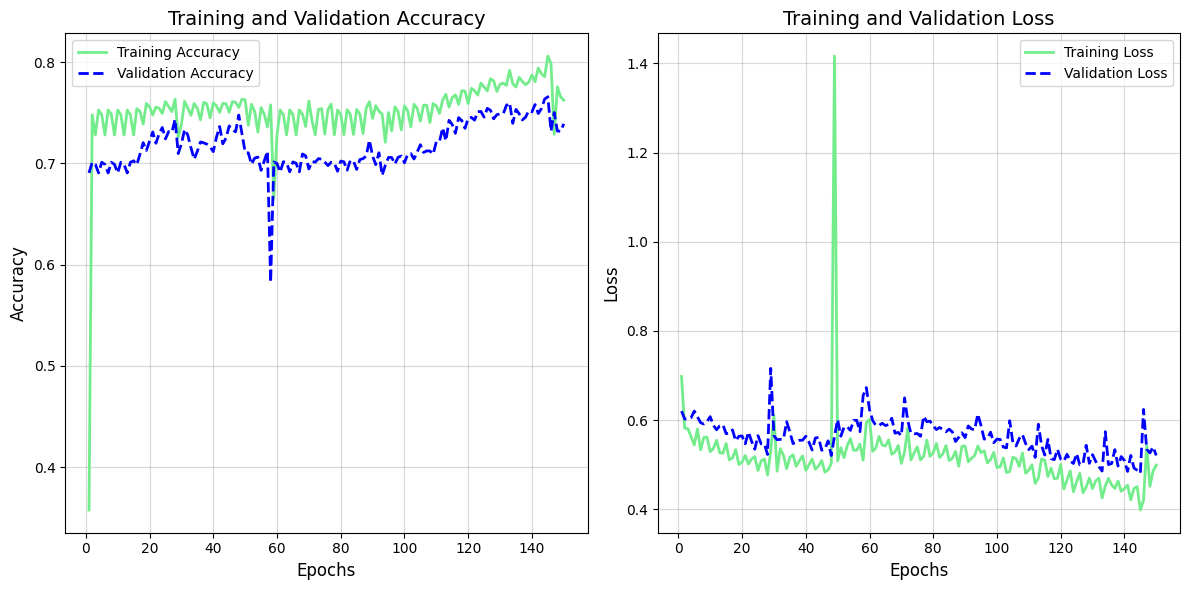

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a sequence for the x-axis (epochs)
epochs = range(1, len(acc) + 1)

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, color="#73EC8B", label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, color='blue', linestyle='--', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs (Training Iterations)', fontsize=12)  # Clarify the meaning of epochs
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)  # Add a grid for better readability

# Plot loss
plt.subplot(1, 2, 2)

plt.plot(epochs, loss, color="#73EC8B", label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, color='blue', linestyle='--', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs (Training Iterations)', fontsize=12)  # Clarify the meaning of epochs
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)  # Add a grid for better readability

 # Adjust spacing between subplots and labels
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on validation data
loss, accuracy, dice, iou = model_evaluate(model, val_gen, validation_steps)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Dice Coefficient: {dice:.4f}")
print(f"Validation IoU: {iou:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7389 - loss: 0.5187
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Validation Loss: 0.5208
Validation Accuracy: 0.7390
Validation Dice Coefficient: 0.3819
Validation IoU: 0.2366


Thh acc of model is 73.90%.

### **Model Testing**

In [ ]:
# Path to test directory
test_dir = "/content/dataset/test-30"
test_images_dir = os.path.join(test_dir)

In [ ]:
# Load the trained model
model = load_model("unet_model.keras", custom_objects={
    'dice_coefficient': dice_coefficient,
    'iou_metric': iou_metric
})

In [ ]:
# List of specific image filenames - for testing model
specific_images = [
    "/content/dataset/test-30/000000001385.jpg",
    "/content/dataset/test-30/000000001410.jpg",
    "/content/dataset/test-30/000000001671.jpg",
    "/content/dataset/test-30/000000001750.jpg",
    "/content/dataset/test-30/000000001773.jpg"
]

In [ ]:
# Updated test generator for specific images
def test_generate(image_dir, image_list, target_size=(128, 128)):
    image_paths = [os.path.join(image_dir, fname) for fname in image_list]

    for image_path in image_paths:
        # Load and preprocess image
        image = cv2.imread(image_path)
        # Convert to RGB for visualization
        original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, target_size)
        normalised_image = resized_image / 255.0  # Normalize to [0, 1]

        yield original_image, np.expand_dims(normalised_image, axis=0)

In [ ]:
def overlay_mask(image, mask, color=(255, 0, 0), alpha=0.5):
    """Overlays a colored mask on an image.

    Args:
        image: The original image.
        mask: A binary mask with values 0 or 1.
        color: The color of the overlay.
        alpha: The transparency of the overlay (0: fully transparent, 1: fully opaque).

    Returns:
        The image with the overlay.
    """

    # Create a mask image with the specified color
    mask_colored = np.zeros_like(image)
    mask_colored[mask == 1] = color

    # Overlay the colored mask onto the original image using weighted addition
    overlay = cv2.addWeighted(image, 1 - alpha, mask_colored, alpha, 0)

    return overlay

In [ ]:
def visualise_predictions(model, generator, num_samples=5):
    """Visualizes predictions made by the model on a data generator.

    Args:
        model: The U-Net model.
        generator: A data generator yielding batches of images.
        num_samples: The number of samples to visualize (default: 5).
    """

    for i, (original_image, input_image) in enumerate(generator):
        # Limit the visualization to a specific number of samples
        if i >= num_samples:
            break

        # Get the predicted mask from the model
        predicted_mask = model.predict(input_image)[0, :, :, 0]

        # Threshold the predicted mask to binary (0 or 1)
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

        # Resize the mask to match the original image size
        resized_mask = cv2.resize(predicted_mask, (original_image.shape[1], original_image.shape[0]))

        # Overlay the mask on the original image with red color and 50% transparency
        overlayed_image = overlay_mask(original_image, resized_mask, color=(255, 0, 0), alpha=0.5)

        # Create a figure for plotting
        plt.figure(figsize=(18, 6))

        # Subplot 1: Original Image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(original_image)
        plt.axis("off")  # Hide axes for cleaner visualization

        # Subplot 2: Predicted Mask
        plt.subplot(1, 3, 2)
        plt.title("Predicted Mask")
        plt.imshow(resized_mask, cmap="gray")  # Use grayscale colormap for mask
        plt.axis("off")

        # Subplot 3: Overlayed Image
        plt.subplot(1, 3, 3)
        plt.title("Input Image with Mask Overlay")
        plt.imshow(overlayed_image)
        plt.axis("off")

        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


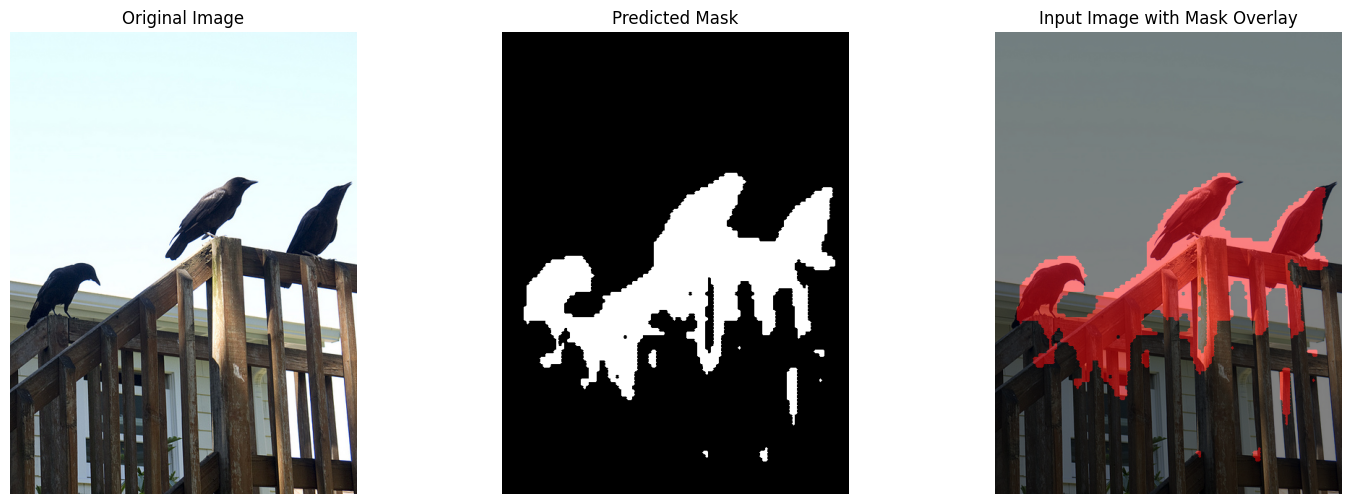

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


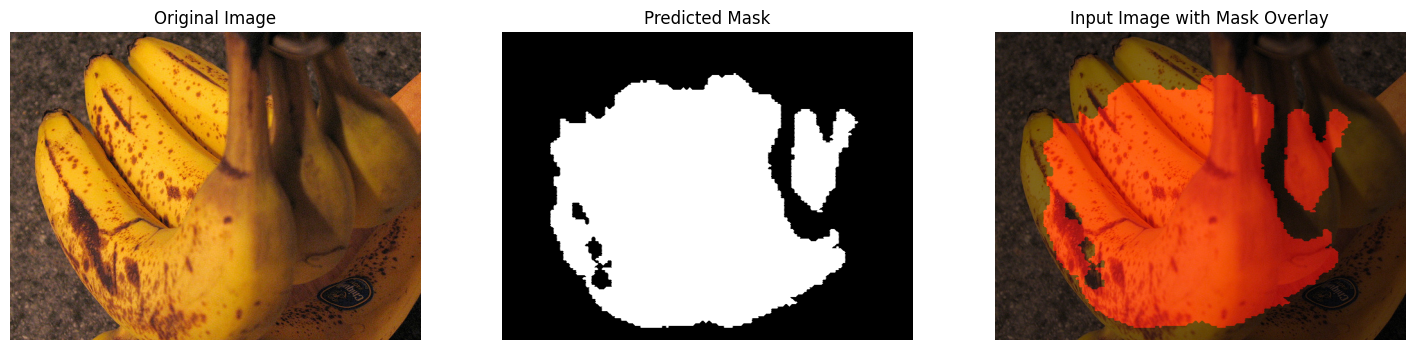

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


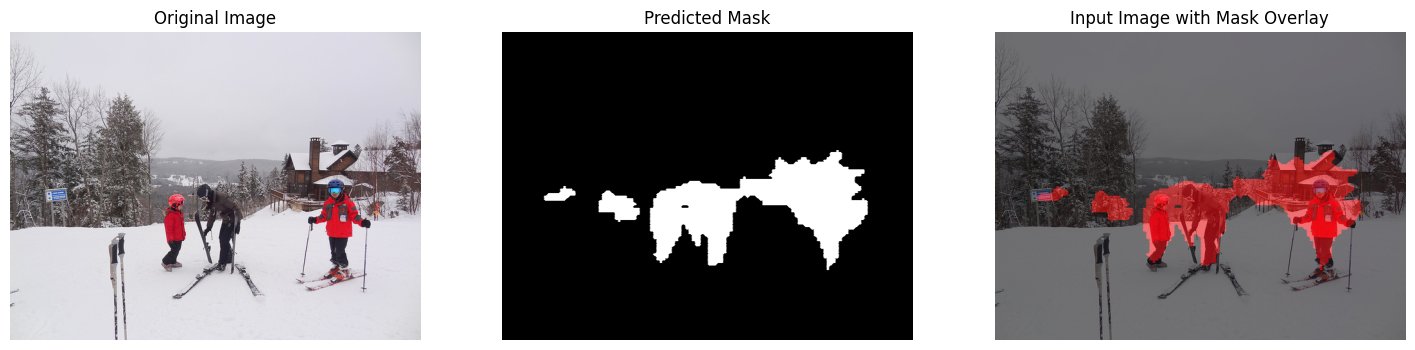

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


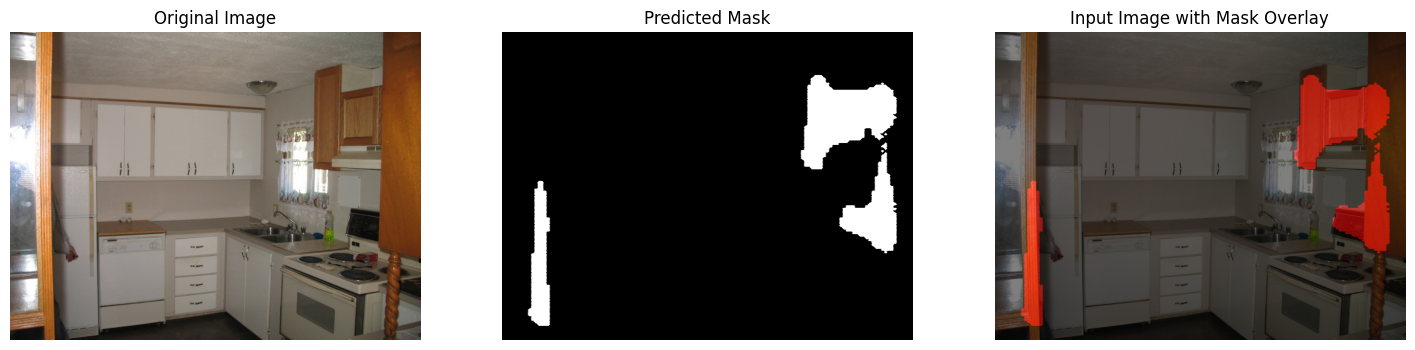

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


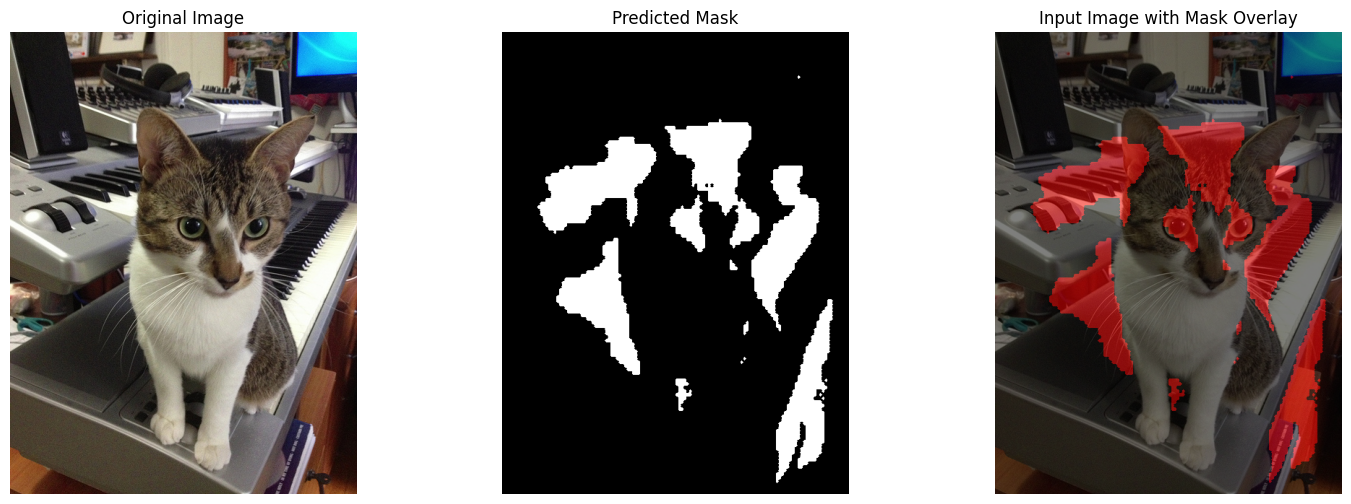

In [ ]:
# Create test generator for specific images
test_gen_specific = test_generate(test_images_dir, specific_images)

# Visualise predictions for the specific images
visualise_predictions(model, test_gen_specific, num_samples=5)

## **Image Preprocessing**


In [ ]:
# Define preprocess dir
preprocess_train_dir = "/content/dataset/preprocess/train"
preprocess_val_dir = "/content/dataset/preprocess/val"

# Create preprocess directories if they don't exist
os.makedirs(preprocess_train_dir, exist_ok=True)
os.makedirs(preprocess_val_dir, exist_ok=True)

In [ ]:
# Brightness and Contrast Parameters
brightness_mean = 113.84
contrast_std = 12.86

# Resize all images to 128x128 for consistency
target_size = (128, 128)

In [ ]:
def bright_con(img, brightness_mean=113.84, contrast_std=12.86):
    """Adjusts the brightness and contrast of an image.

    Args:
        img: The input image.
        brightness_mean: The desired mean brightness.
        contrast_std: The desired standard deviation of contrast.

    Returns:
        The adjusted image.
    """

    # Adjust Brightness
    enhancer_brightness = ImageEnhance.Brightness(img)
    current_brightness = np.mean(np.array(img))  # Calculate current mean brightness
    brightness_factor = brightness_mean / current_brightness  # Calculate brightness adjustment factor
    img = enhancer_brightness.enhance(brightness_factor)

    # Adjust Contrast
    enhancer_contrast = ImageEnhance.Contrast(img)
    current_contrast = np.std(np.array(img))  # Calculate current standard deviation of contrast
    contrast_factor = contrast_std / current_contrast  # Calculate contrast adjustment factor
    img = enhancer_contrast.enhance(contrast_factor)

    return img

In [ ]:
# Function to resize the image
def resize_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    return img


In [ ]:
def normalise_image(img):
    """Normalises an image to the range [0, 1].

    Args:
        img: The input image.

    Returns:
        The normalized image.
    """

    img_array = np.array(img)  # Convert the image to a NumPy array
    img_array = img_array / 255.0  # Divide each pixel value by 255 to scale to [0, 1]
    return img_array

In [ ]:
# Process training images
for filename in os.listdir(train_dir):
    img_path = os.path.join(train_dir, filename)

    if os.path.isfile(img_path):
        # Load the image
        img = Image.open(img_path)

        # Resize the image
        img = resize_image(img, target_size)

        # Adjust brightness and contrast
        img = bright_con(img, brightness_mean, contrast_std)

        # Normalize the image
        img_array = normalise_image(img)

        # Convert the image back to PIL format after normalization
        img = Image.fromarray((img_array * 255).astype(np.uint8))  # Convert back to original scale

        # Save the processed image in the preprocess folder
        save_path = os.path.join(preprocess_train_dir, filename)
        img.save(save_path)

        print(f"Processed and saved (train): {filename}")

Processed and saved (train): 000000007685.jpg
Processed and saved (train): 000000016403.jpg
Processed and saved (train): 000000010920.jpg
Processed and saved (train): 000000006414.jpg
Processed and saved (train): 000000000094.jpg
Processed and saved (train): 000000016356.jpg
Processed and saved (train): 000000008593.jpg
Processed and saved (train): 000000014375.jpg
Processed and saved (train): 000000012544.jpg
Processed and saved (train): 000000015153.jpg
Processed and saved (train): 000000000149.jpg
Processed and saved (train): 000000011065.jpg
Processed and saved (train): 000000013576.jpg
Processed and saved (train): 000000011579.jpg
Processed and saved (train): 000000001586.jpg
Processed and saved (train): 000000003849.jpg
Processed and saved (train): 000000003337.jpg
Processed and saved (train): 000000013815.jpg
Processed and saved (train): 000000003535.jpg
Processed and saved (train): 000000001006.jpg
Processed and saved (train): 000000001307.jpg
Processed and saved (train): 00000

In [ ]:
# Process validation images (no augmentation)
for filename in os.listdir(val_dir):
    img_path = os.path.join(val_dir, filename)

    if os.path.isfile(img_path):
        # Load the image
        img = Image.open(img_path)

        # Resize the image
        img = resize_image(img, target_size)

        # Adjust brightness and contrast
        img = bright_con(img, brightness_mean, contrast_std)

        # Normalize the image
        img_array = normalise_image(img)

        # Convert the image back to PIL format after normalization
        img = Image.fromarray((img_array * 255).astype(np.uint8))  # Convert back to original scale

        # Save the processed image in the preprocess folder
        save_path = os.path.join(preprocess_val_dir, filename)
        img.save(save_path)

        print(f"Processed and saved (val): {filename}")

print("Image preprocessing completed and saved to preprocess folders.")


Processed and saved (val): 000000085157.jpg
Processed and saved (val): 000000230983.jpg
Processed and saved (val): 000000135410.jpg
Processed and saved (val): 000000001532.jpg
Processed and saved (val): 000000047112.jpg
Processed and saved (val): 000000105455.jpg
Processed and saved (val): 000000144706.jpg
Processed and saved (val): 000000224337.jpg
Processed and saved (val): 000000147740.jpg
Processed and saved (val): 000000201426.jpg
Processed and saved (val): 000000086483.jpg
Processed and saved (val): 000000172330.jpg
Processed and saved (val): 000000166664.jpg
Processed and saved (val): 000000177934.jpg
Processed and saved (val): 000000006723.jpg
Processed and saved (val): 000000201934.jpg
Processed and saved (val): 000000147223.jpg
Processed and saved (val): 000000192716.jpg
Processed and saved (val): 000000233727.jpg
Processed and saved (val): 000000180878.jpg
Processed and saved (val): 000000076417.jpg
Processed and saved (val): 000000240250.jpg
Processed and saved (val): 00000

## **Model Training - Preprocessing**

In [ ]:
# Build model
preprocessed_model = unet_model()

preprocessed_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Summarise model
preprocessed_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 128, 128, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 64, 64, 64)     │              0 │ conv2d_20[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 64, 64, 128)    │        147,584 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 32, 32, 128)    │              0 │ conv2d_22[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 32, 32, 256)    │        590,080 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 16, 16, 256)    │              0 │ conv2d_24[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 8, 8, 512)      │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_4        │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_28[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4        

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

### **Data Agumentation**

In [ ]:
# Define preprocessed train_gen and val_gen
preprocessed_train_gen = data_generator(
    "/content/dataset/preprocess/train",
    "/content/dataset/train-300/masks",
    batch_size=batch_size
)

preprocessed_val_gen = data_generator(
    "/content/dataset/preprocess/val",
    "/content/dataset/validation-300/masks",
    batch_size=batch_size
)


In [ ]:
# Calculate steps per epoch
preprocessed_num_train_images = len(os.listdir("/content/dataset/preprocess/train"))
preprocessed_num_val_images = len(os.listdir("/content/dataset/preprocess/val"))

preprocessed_steps_per_epoch = preprocessed_num_train_images // batch_size
preprocessed_validation_steps = preprocessed_num_val_images // batch_size


In [ ]:
# Get shape
preprocessed_images, preprocessed_masks = next(preprocessed_train_gen)

print("Image batch shape:", preprocessed_images.shape)
print("Mask batch shape:", preprocessed_masks.shape)

Image batch shape: (128, 128, 128, 3)
Mask batch shape: (128, 128, 128, 1)


### **Model Training**

In [ ]:
# Add checkpoint
preprocessed_checkpoint = ModelCheckpoint("preprocessed_unet_model.keras", monitor="val_loss", save_best_only=True)

In [ ]:
# Train the model with preprocessed data
preprocessed_history = preprocessed_model.fit(
    preprocessed_train_gen,
    validation_data=preprocessed_val_gen,
    steps_per_epoch=preprocessed_steps_per_epoch,
    validation_steps=preprocessed_validation_steps,
    epochs=150,
    callbacks=[preprocessed_checkpoint]
)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 11s/step - accuracy: 0.4301 - loss: 0.6946 - val_accuracy: 0.6905 - val_loss: 0.6557
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.7246 - loss: 0.6198 - val_accuracy: 0.7010 - val_loss: 0.6162
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.7566 - loss: 0.5657 - val_accuracy: 0.6989 - val_loss: 0.6130
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.7424 - loss: 0.5755 - val_accuracy: 0.6905 - val_loss: 0.6184
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step - accuracy: 0.7246 - loss: 0.5919 - val_accuracy: 0.7010 - val_loss: 0.6082
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7566 - loss: 0.5580 - val_accuracy: 0.6989 - val_loss: 0.6237
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7424 - loss: 0.5685 - val_accuracy: 0.6905 - val_loss: 0.6295
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step - accuracy: 0.7246 - loss: 0.5844 - val_accuracy: 0.7010 - val_loss: 0.6072
Epoch

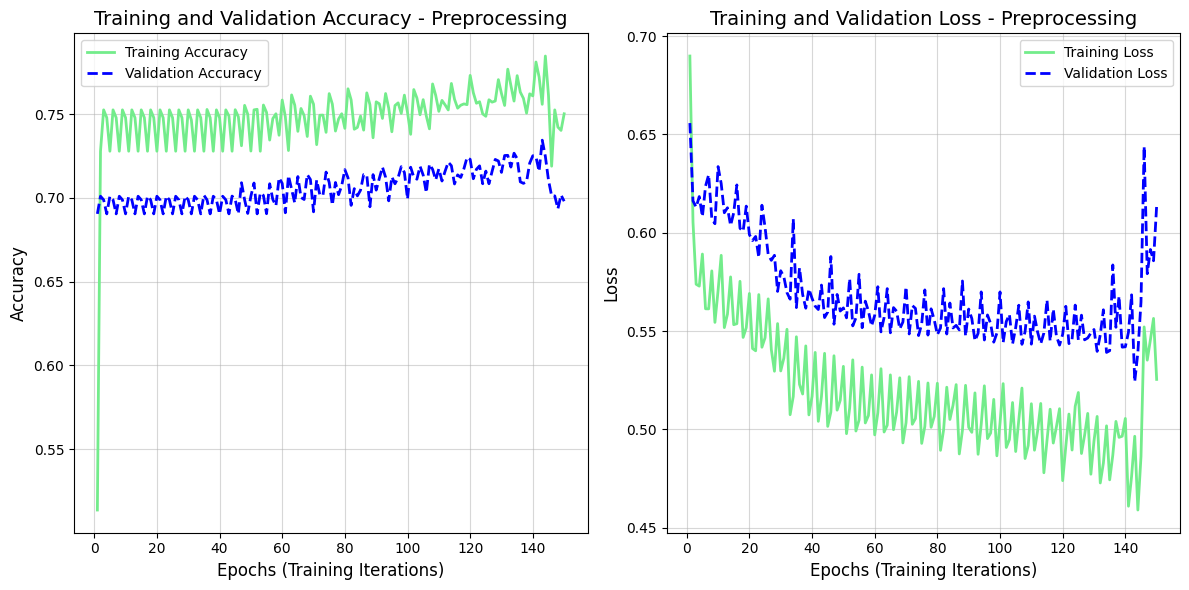

In [ ]:
acc = preprocessed_history.history['accuracy']
val_acc = preprocessed_history.history['val_accuracy']
loss = preprocessed_history.history['loss']
val_loss = preprocessed_history.history['val_loss']

# Create a sequence for the x-axis (epochs)
epochs = range(1, len(acc) + 1)

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, color="#73EC8B", label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, color='blue', linestyle='--', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy - Preprocessing', fontsize=14)
plt.xlabel('Epochs (Training Iterations)', fontsize=12)  # Clarify the meaning of epochs
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)  # Add a grid for better readability

# Plot loss
plt.subplot(1, 2, 2)

plt.plot(epochs, loss, color="#73EC8B", label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, color='blue', linestyle='--', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss - Preprocessing', fontsize=14)
plt.xlabel('Epochs (Training Iterations)', fontsize=12)  # Clarify the meaning of epochs
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)  # Add a grid for better readability

 # Adjust spacing between subplots and labels
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on validation data
preprocessed_loss, preprocessed_accuracy, preprocessed_dice, preprocessed_iou =  model_evaluate(preprocessed_model, preprocessed_val_gen, preprocessed_validation_steps)

print(f"Validation Loss: {preprocessed_loss:.4f}")
print(f"Validation Accuracy: {preprocessed_accuracy:.4f}")
print(f"Validation Dice Coefficient: {preprocessed_dice:.4f}")
print(f"Validation IoU: {preprocessed_iou:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.6955 - loss: 0.6162
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Validation Loss: 0.6138
Validation Accuracy: 0.6981
Validation Dice Coefficient: 0.2611
Validation IoU: 0.1503


Thh acc of model is 69.81%.

### **Model Testing**

In [ ]:
# Load the trained model
preprocessed_model = load_model("preprocessed_unet_model.keras", custom_objects={
    'dice_coefficient': dice_coefficient,
    'iou_metric': iou_metric
})

In [ ]:
def test_generate_preprocess(image_dir, image_list, target_size=(128, 128), brightness_mean=127.5, contrast_std=50.0):
    """
    Test generator for specific images with preprocessing.

    Args:
    - image_dir: Directory containing the images.
    - image_list: List of specific image filenames to process.
    - target_size: Target size for resizing images (default is (128, 128)).
    - brightness_mean: Mean brightness for adjustment.
    - contrast_std: Standard deviation for contrast adjustment.

    Yields:
    - original_image: Original image (RGB) for visualization.
    - normalised_image: Preprocessed image ready for model input.
    """
    image_paths = [os.path.join(image_dir, fname) for fname in image_list]

    for image_path in image_paths:
        # Load the image
        img = Image.open(image_path)

        # Resize the image
        img = resize_image(img, target_size)

        # Adjust brightness and contrast
        img = bright_con(img, brightness_mean, contrast_std)

        # Normalize the image
        img_array = normalize_image(img)

        # Convert the image back to RGB format after normalization
        img = Image.fromarray((img_array * 255).astype(np.uint8))  # Convert back to original scale
        original_image = np.asarray(img.convert("RGB"))  # Ensure RGB format for visualization

        # Prepare normalised image for the model
        normalised_image = np.expand_dims(img_array, axis=0)  # Add batch dimension for model input

        yield original_image, normalised_image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


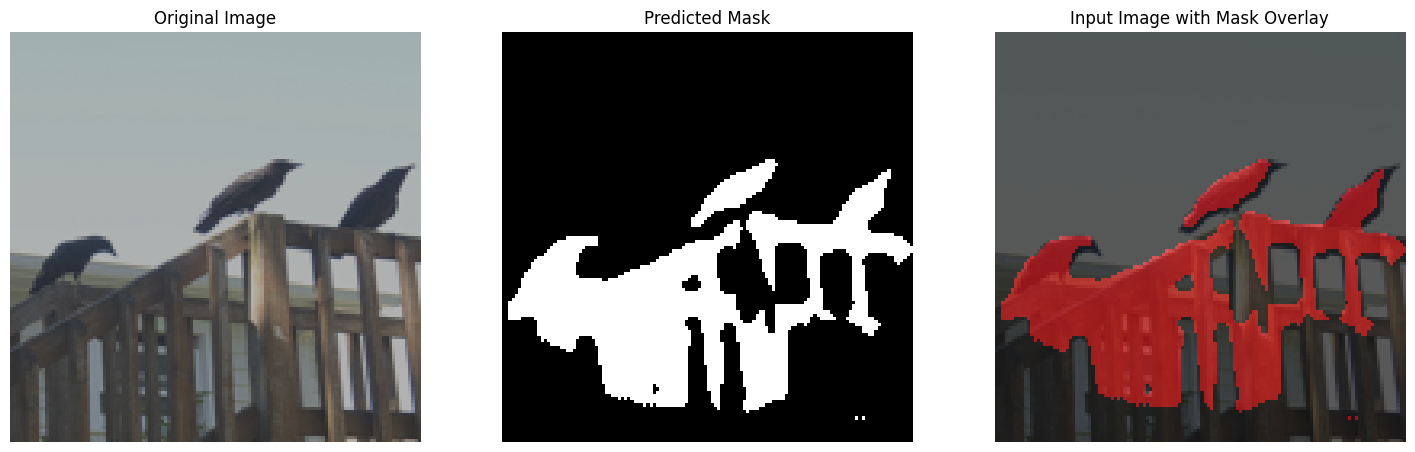

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


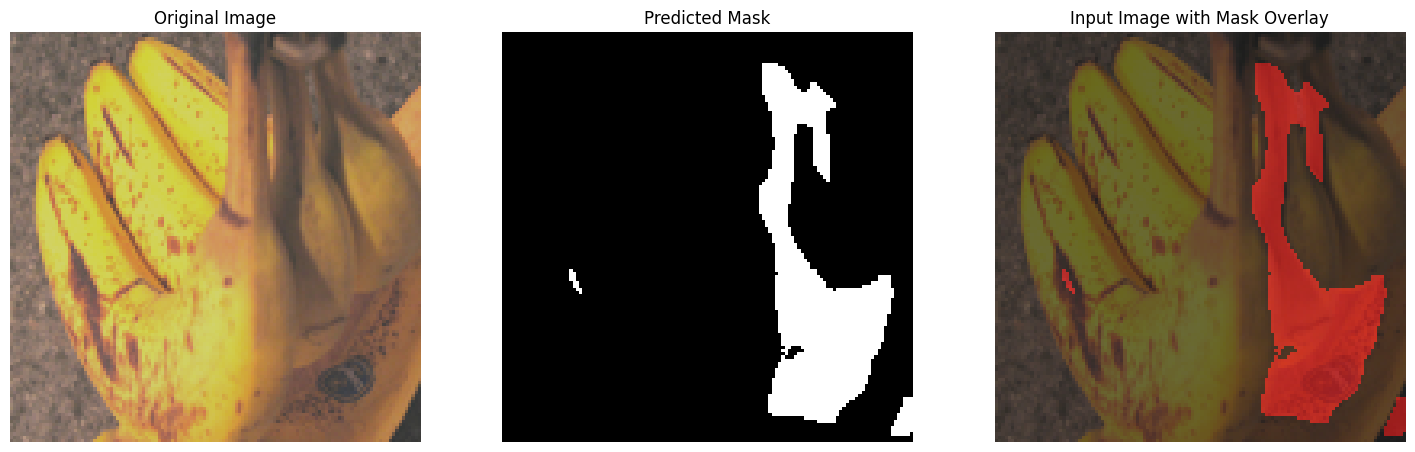

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


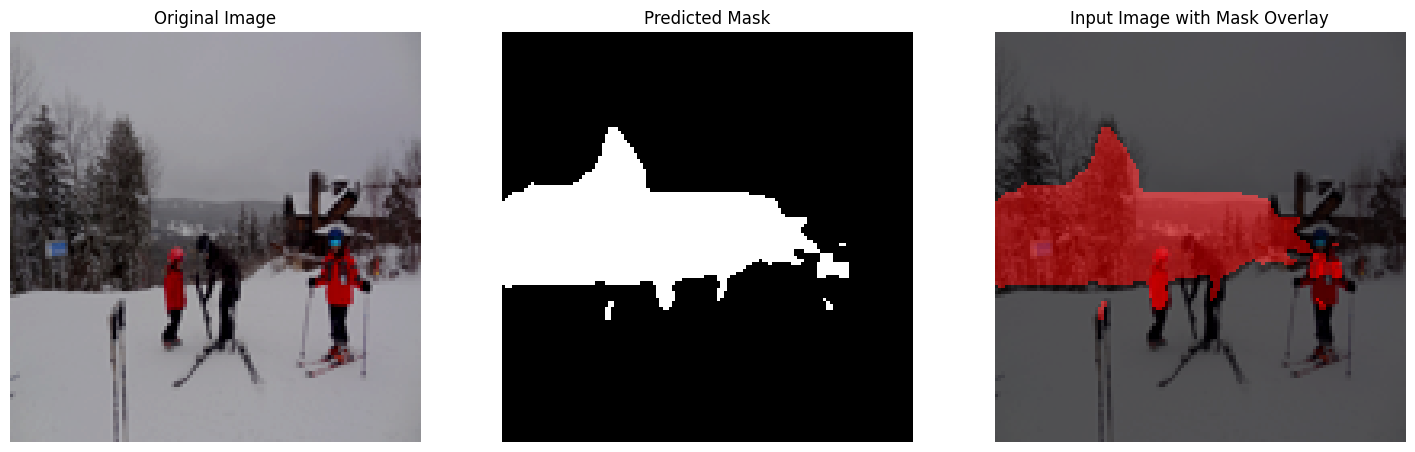

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


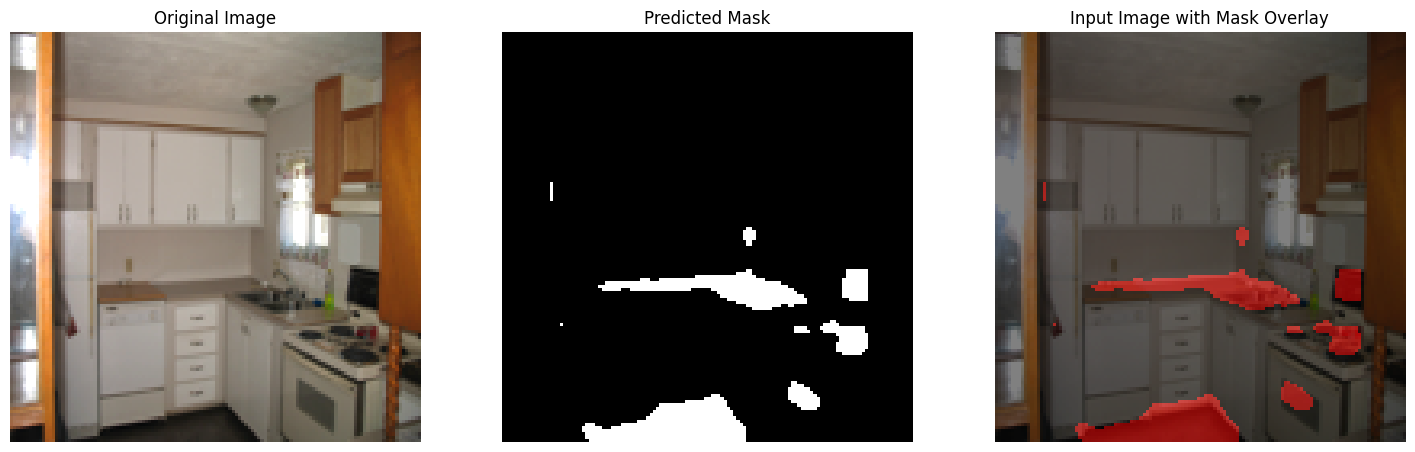

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


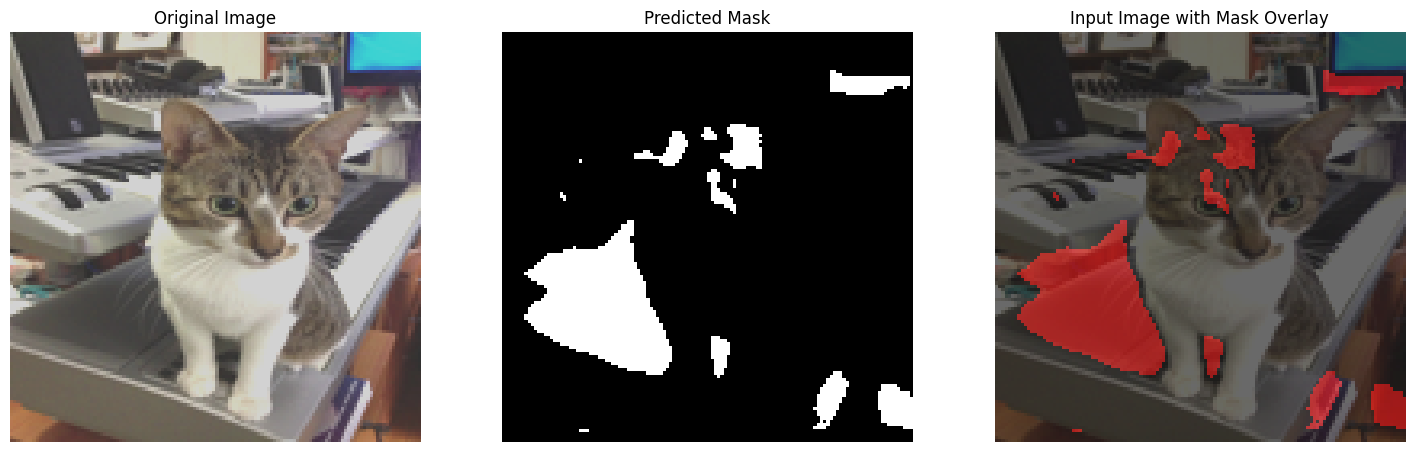

In [ ]:
# Create test generator
preprocessed_test_gen = test_generate_preprocess(
    image_dir=test_images_dir,
    image_list=specific_images,
    target_size=(128, 128),
    brightness_mean=127.5,
    contrast_std=50.0
)

# Visualise predictions
visualize_predictions(preprocessed_model, preprocessed_test_gen, num_samples=len(specific_images))

## **Overview**

As the data didn't have mask images, using the label.json the mask image were created with using a custom function which was good enough to mask the image but not accurate.

To train the model first direct data was passed which had the acc of 74% on validation data with good segmentation on test data image. Another model was passed with applying many preprocessing but was not accurate and made few error while segmentation.

**Challenges** that came were like masking the image and seelcing the model as memroy issue were coming during the time.